# ÌîÑÎ°úÏ†ùÌä∏ : Segmentation mapÏúºÎ°ú ÎèÑÎ°ú Ïù¥ÎØ∏ÏßÄ ÎßåÎì§Í∏∞

---
## Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
---

In [1]:
import os

data_path = os.getenv('HOME')+'/aiffel/cityscapes/train/'
print("number of train examples :", len(os.listdir(data_path)))

number of train examples : 1000


#### ÌïôÏäµÏö© Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú ÏûÑÏùòÎ°ú 6Ïû•ÏùÑ ÏÑ†ÌÉùÌïòÏó¨ ÏãúÍ∞ÅÌôî

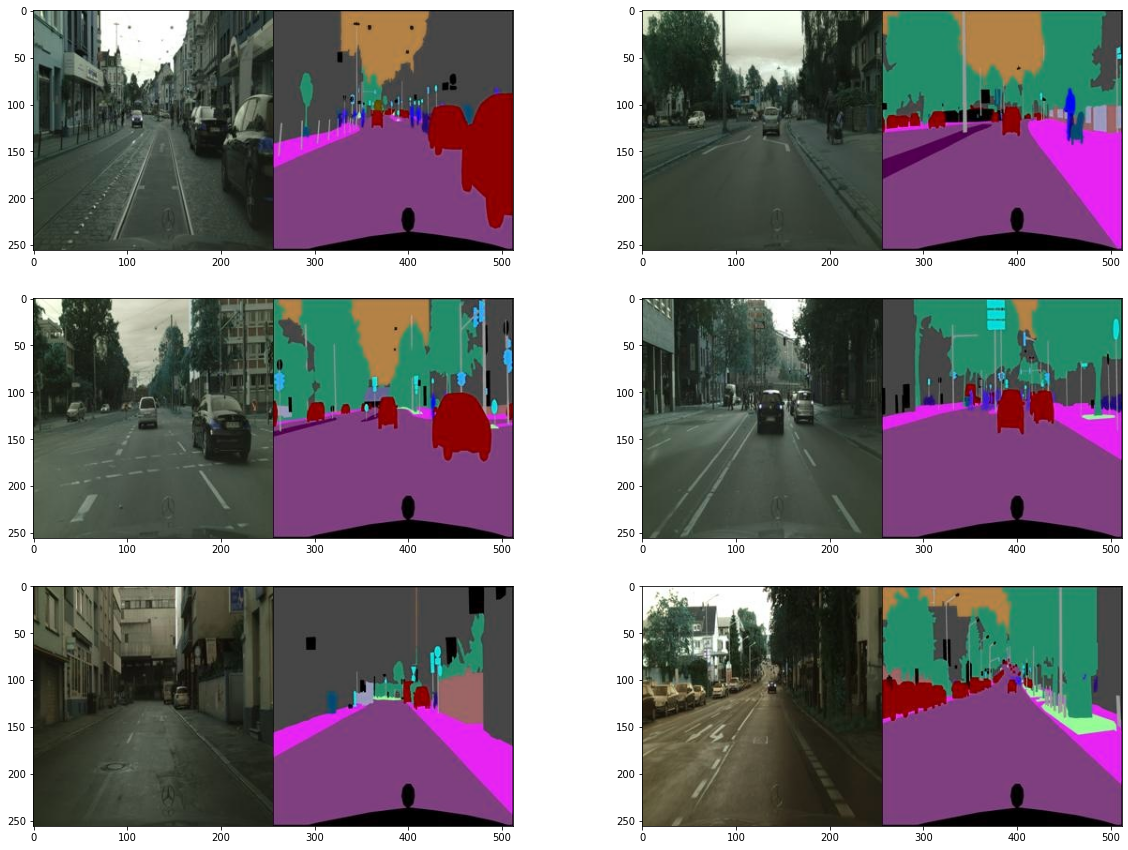

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
for i in range(1, 7):
    f = data_path + os.listdir(data_path)[np.random.randint(1000)]
    img = cv2.imread(f, cv2.IMREAD_COLOR)
    plt.subplot(3,2,i)
    plt.imshow(img)

In [5]:
# Ïù¥ÎØ∏ÏßÄ shape ÌôïÏù∏
f = data_path + os.listdir(data_path)[0]
img = cv2.imread(f, cv2.IMREAD_COLOR)
print(img.shape)

(256, 512, 3)


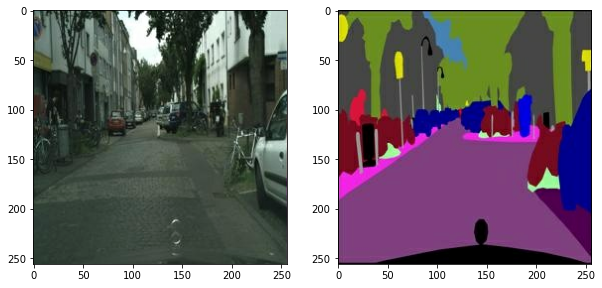

In [6]:
#----------------------------------------------------------------------------
# Î™®Îç∏ ÌïôÏäµÏóê ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞Î•º (256, 256, 3) ÌÅ¨Í∏∞Ïùò 2Í∞ú Ïù¥ÎØ∏ÏßÄÎ°ú Î∂ÑÌï†ÌïòÎäî Ìï®Ïàò
#----------------------------------------------------------------------------
import tensorflow as tf

def normalize(x):
    x = tf.cast(x, tf.float32)
    return (x/127.5) - 1

def denormalize(x):
    x = (x+1)*127.5
    x = x.numpy()
    return x.astype(np.uint8)

def load_img(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, 3)
    
    w = tf.shape(img)[1] // 2
    sketch = img[:, :w, :] 
    sketch = tf.cast(sketch, tf.float32)
    colored = img[:, w:, :] 
    colored = tf.cast(colored, tf.float32)
    return normalize(sketch), normalize(colored)
#----------------------------------------------------------------------------

# ÌÖåÏä§Ìä∏
f = data_path + os.listdir(data_path)[1]
sketch, colored = load_img(f)

plt.figure(figsize=(10,7))
plt.subplot(1,2,1); plt.imshow(denormalize(sketch))
plt.subplot(1,2,2); plt.imshow(denormalize(colored))

#### Augmentation
Í∏∞Ï°¥ Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌòï, ÌôïÏû• ÌòπÏùÄ Ïû¨Íµ¨ÏÑ±ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÌÅ¨Í∏∞Î•º Ï¶ùÍ∞ÄÏãúÌÇ§Îäî Í∏∞Î≤ï  
- Î™®Îç∏Ïùò ÏùºÎ∞òÌôî Îä•Î†•ÏùÑ Ìñ•ÏÉÅ, Í≥ºÎåÄÏ†ÅÌï© Î∞©ÏßÄ, Îç∞Ïù¥ÌÑ∞Ïùò Î∂àÍ∑†Ìòï Î¨∏Ï†ú Ìï¥ÏÜåÎ•º ÏúÑÌï¥ ÏÇ¨Ïö©
- ÏÉÅÌïò ÌòπÏùÄ Ï¢åÏö∞Î°ú Îí§ÏßëÍ∏∞, ÌöåÏ†Ñ, ÌÅ¨Î°≠(Cropping), ÌôïÎåÄ Î∞è Ï∂ïÏÜå Îì±Ïùò Í∏∞Î≤ï ÏÇ¨Ïö©

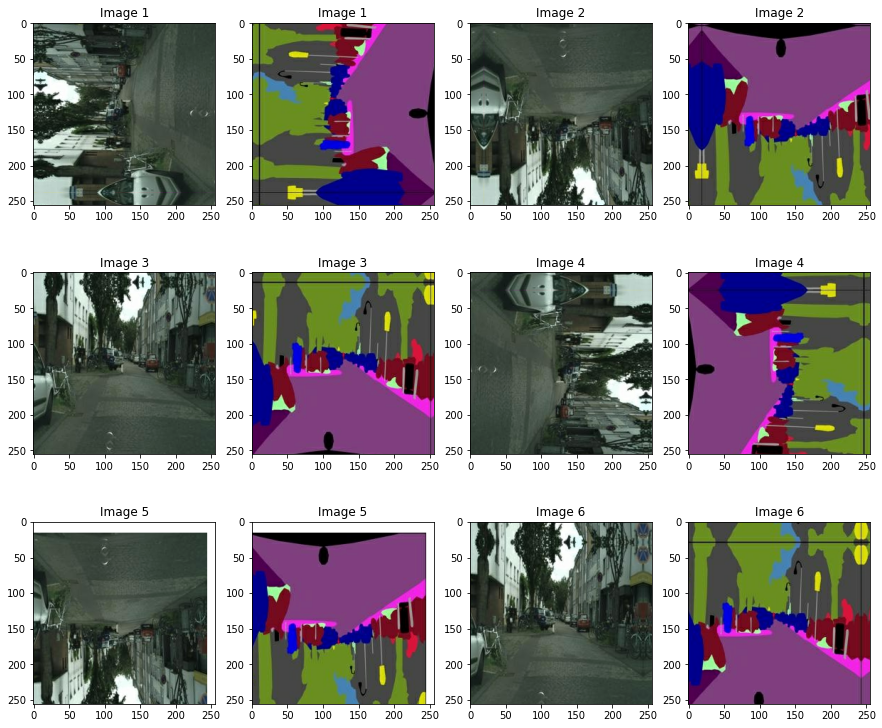

In [7]:
from tensorflow import image
from tensorflow.keras.preprocessing.image import random_rotation

#----------------------------------------------------------------------------------------
# Ïä§ÏºÄÏπò Î∞è Ï±ÑÏÉâÎêú 2Í∞ú Ïù¥ÎØ∏ÏßÄÎ•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÏïÑ ÎûúÎç§ Ïó∞ÏÇ∞ÏùÑ Îëê Ïù¥ÎØ∏ÏßÄÏóê ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©
#----------------------------------------------------------------------------------------
@tf.function() # Îπ†Î•∏ ÌÖêÏÑúÌîåÎ°ú Ïó∞ÏÇ∞ÏùÑ ÏúÑÌï¥ @tf.function()ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§. 
def apply_augmentation(sketch, colored):
    # Ïó≠Î∞©Ìñ• Ï∂ïÏúºÎ°ú Ïù¥ÎØ∏ÏßÄ(ÌÖêÏÑú) Í≤∞Ìï©
    stacked = tf.concat([sketch, colored], axis=-1)
    
    # ÎûúÎç§ÏúºÎ°ú REFLECT ÎòêÎäî CONSTANT Î™®ÎìúÎ•º ÏßÄÏ†ïÌïòÏó¨ 30ÌîΩÏÖÄ ÎßåÌÅº Ìå®Îî©
    _pad = tf.constant([[30,30],[30,30],[0,0]])
    if tf.random.uniform(()) < .5:
        padded = tf.pad(stacked, _pad, "REFLECT")
    else:
        padded = tf.pad(stacked, _pad, "CONSTANT", constant_values=1.)

    # 256*256*6 ÌÅ¨Í∏∞Î°ú ÎûúÎç§ÏúºÎ°ú ÏûêÎ•¥Í∏∞
    out = image.random_crop(padded, size=[256, 256, 6])
    # Î¨¥ÏûëÏúÑÎ°ú Ï¢åÏö∞ Î∞òÏ†Ñ
    out = image.random_flip_left_right(out)
    # Î¨¥ÏûëÏúÑÎ°ú ÏÉÅÌïò Î∞òÏ†Ñ
    out = image.random_flip_up_down(out)
    # Î¨¥ÏûëÏúÑ ÌöåÏ†Ñ
    if tf.random.uniform(()) < .5:
        degree = tf.random.uniform([], minval=1, maxval=4, dtype=tf.int32)
        out = image.rot90(out, k=degree)
    
    return out[...,:3], out[...,3:]   
#----------------------------------------------------------------------------------------

#  ÌÖåÏä§Ìä∏
plt.figure(figsize=(15,13))
img_n = 1
for i in range(1, 13, 2):
    augmented_sketch, augmented_colored = apply_augmentation(sketch, colored)
    
    plt.subplot(3,4,i)
    plt.imshow(denormalize(augmented_sketch)); plt.title(f"Image {img_n}")
    plt.subplot(3,4,i+1); 
    plt.imshow(denormalize(augmented_colored)); plt.title(f"Image {img_n}")
    img_n += 1

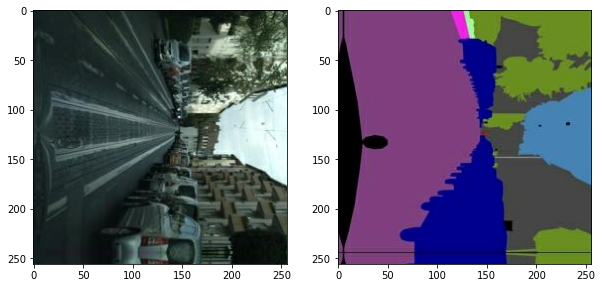

In [8]:
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Ïóê ÏúÑ ÎûúÎç§ Î≥ÄÌôò Ìï®Ïàò Ï†ÅÏö©
from tensorflow import data

def get_train(img_path):
    sketch, colored = load_img(img_path)
    sketch, colored = apply_augmentation(sketch, colored)
    return sketch, colored

train_images = data.Dataset.list_files(data_path + "*.jpg")
train_images = train_images.map(get_train).shuffle(100).batch(4)

# ÌïòÎÇòÏùò Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî ÌôïÏù∏
sample = train_images.take(1)
sample = list(sample.as_numpy_iterator())
sketch, colored = (sample[0][0]+1)*127.5, (sample[0][1]+1)*127.5

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(sketch[0].astype(np.uint8))
plt.subplot(1,2,2); plt.imshow(colored[0].astype(np.uint8))

---
## Generator Íµ¨ÏÑ±ÌïòÍ∏∞
---
### GeneratorÏùò Íµ¨ÏÑ±ÏöîÏÜå
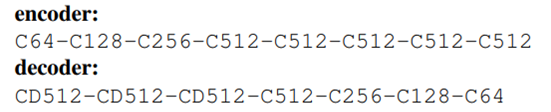  
**C64** : 64Í∞úÏùò 4x4 ÌïÑÌÑ∞Ïóê stride 2Î•º Ï†ÅÏö©Ìïú Convolution ‚Üí 0.2 slopeÏùò LeakyReLU  
**CD512** : 512Í∞úÏùò 4x4 ÌïÑÌÑ∞Ïóê stride 2Î•º Ï†ÅÏö©Ìïú (Transposed) Convolution ‚Üí BatchNorm ‚Üí 50% Dropout ‚Üí ReLU  
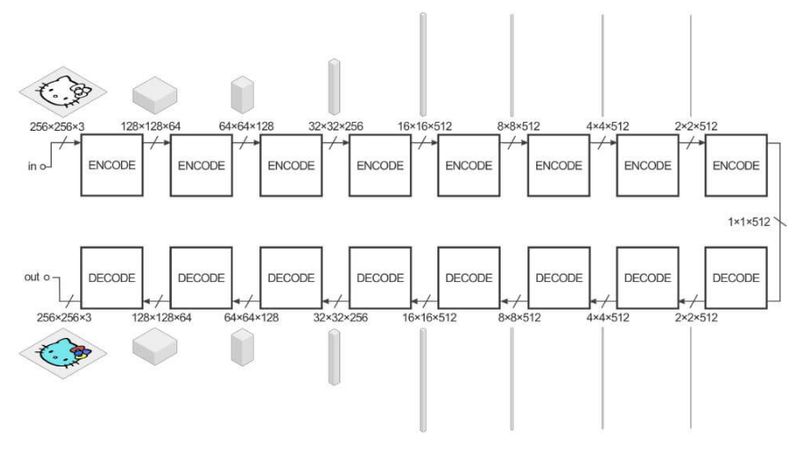  

### Generator : U-Net Generator

In [10]:
from tensorflow.keras import layers, Input, Model
#--------------------------------------------------------------------------
# Ïù∏ÏΩîÎìú Î∏îÎü≠ ÌÅ¥ÎûòÏä§
#--------------------------------------------------------------------------
'''
3Í∞ú Î†àÏù¥Ïñ¥Î°ú Íµ¨ÏÑ±Îêú Í∏∞Î≥∏ Î∏îÎ°ù
Convolution ‚Üí BatchNorm ‚Üí LeakyReLU 

ÏÉùÏÑ±Ïûê Parameters
- n_filters : Convolution ÌïÑÌÑ∞ Ïàò
- use_bn : BatchNorm Ï†ÅÏö© Ïó¨Î∂Ä (default: True)
'''

class EncodeBlock(layers.Layer):
    def __init__(self, n_filters, use_bn=True):
        super(EncodeBlock, self).__init__()
        self.use_bn = use_bn
        self.conv = layers.Conv2D(n_filters, 4, 2, "same", use_bias=False) #ÌïÑÌÑ∞Ïùò ÌÅ¨Í∏∞(=4) Î∞è stride(=2) Í≥†Ï†ï
        self.batchnorm = layers.BatchNormalization()
        self.lrelu= layers.LeakyReLU(0.2) #slope coefficient(=0.2) Í≥†Ï†ï

    def call(self, x):
        x = self.conv(x)
        if self.use_bn:
            x = self.batchnorm(x)
        return self.lrelu(x)
#--------------------------------------------------------------------------
# ÎîîÏΩîÎìú Î∏îÎü≠ ÌÅ¥ÎûòÏä§
#--------------------------------------------------------------------------
'''
4Í∞ú Î†àÏù¥Ïñ¥Î°ú Íµ¨ÏÑ±Îêú Í∏∞Î≥∏ Î∏îÎ°ù
(Transposed) Convolution ‚Üí BatchNorm ‚Üí 50% Dropout ‚Üí ReLU 

ÏÉùÏÑ±Ïûê Parameters
- f : TransposeConvolution ÌïÑÌÑ∞ Ïàò
- dropout : Dropout Ï†ÅÏö© Ïó¨Î∂Ä (default: True)
'''
class DecodeBlock(layers.Layer):
    def __init__(self, f, dropout=True):
        super(DecodeBlock, self).__init__()
        self.dropout = dropout
        self.Transconv = layers.Conv2DTranspose(f, 4, 2, "same", use_bias=False) #ÌïÑÌÑ∞Ïùò ÌÅ¨Í∏∞(=4) Î∞è stride(=2) Í≥†Ï†ï
        self.batchnorm = layers.BatchNormalization()
        self.relu = layers.ReLU()
        
    def call(self, x):
        x = self.Transconv(x)
        x = self.batchnorm(x)
        if self.dropout:
            x = layers.Dropout(.5)(x) #(.5) 50% Dropout
        return self.relu(x)
#--------------------------------------------------------------------------
# U-Net Generator ÌÅ¥ÎûòÏä§
#--------------------------------------------------------------------------
class UNetGenerator(Model):
    def __init__(self):
        super(UNetGenerator, self).__init__()
        
        # Ïù∏ÏΩîÎî© Î†àÏù¥Ïñ¥
        encode_filters = [64,128,256,512,512,512,512,512]        
        self.encode_blocks = []
        for i, f in enumerate(encode_filters):
            self.encode_blocks.append(EncodeBlock(f, i != 0))
            
        # ÎîîÏΩîÎî© Î†àÏù¥Ïñ¥
        decode_filters = [512,512,512,512,256,128,64]
        self.decode_blocks = []
        for i, f in enumerate(decode_filters):
            self.decode_blocks.append(DecodeBlock(f, i < 3))        
        self.last_conv = layers.Conv2DTranspose(3, 4, 2, "same", use_bias=False)
    
    def call(self, x):
        features = []
        for block in self.encode_blocks:
            x = block(x)
            # EncoderÏôÄ Decoder ÏÇ¨Ïù¥Ïùò skip connectionÏùÑ ÏúÑÌï¥ Encoder ÎÇ¥ÏóêÏÑú ÏÇ¨Ïö©Îêú Í∞Å Î∏îÎ°ùÎì§Ïùò Ï∂úÎ†• Ï†ÄÏû•
            features.append(x)             
        
        # ÎßàÏßÄÎßâ Encoder Ï∂úÎ†• ÏÇ≠Ï†ú
        features = features[:-1]
                    
        for block, feat in zip(self.decode_blocks, features[::-1]):
            x = block(x)
            # EncoderÏôÄ Decoder skip connection
            x = layers.Concatenate()([x, feat])
        
        x = self.last_conv(x)
        return x
                
    def get_summary(self, input_shape=(256,256,3)):
        inputs = Input(input_shape)
        return Model(inputs, self.call(inputs)).summary()
#--------------------------------------------------------------------------
UNetGenerator().get_summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
encode_block_8 (EncodeBlock)    (None, 128, 128, 64) 3072        input_2[0][0]                    
__________________________________________________________________________________________________
encode_block_9 (EncodeBlock)    (None, 64, 64, 128)  131584      encode_block_8[0][0]             
__________________________________________________________________________________________________
encode_block_10 (EncodeBlock)   (None, 32, 32, 256)  525312      encode_block_9[0][0]             
____________________________________________________________________________________________

---
## Discriminator Íµ¨ÏÑ±ÌïòÍ∏∞
---
### DiscriminatorÏùò Íµ¨ÏÑ±ÏöîÏÜå
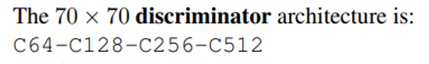  
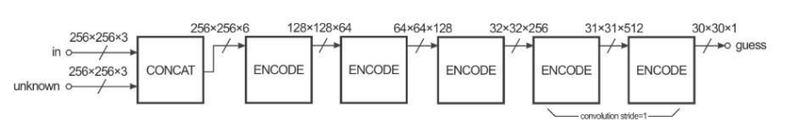  
- 2Í∞ú ÏûÖÎ†•(ÏúÑ Í∑∏Î¶ºÏùò "in", "unknown")ÏùÑ Î∞õÏïÑ Ïó∞Í≤∞(**CONCAT**)Ìïú ÌõÑ, ENCODE ÎùºÍ≥† Ïì∞Ïù∏ 5Í∞úÏùò Î∏îÎ°ùÏùÑ ÌÜµÍ≥º
- ÎßàÏßÄÎßâ Î∏îÎ°ùÏùÑ Ï†úÏô∏Ìïú 4Í∞ú Î∏îÎ°ùÏùÄ ÏúÑÏóêÏÑú ÌëúÍ∏∞Îêú **C64-C128-C256-C512** Ïóê Ìï¥Îãπ
- ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú Ï∂úÎ†•ÎêòÎäî ÌÅ¨Í∏∞Îäî (30,30,1) : **70x70 PatchGAN** ÏÇ¨Ïö©

 
Ï∂úÎ†• Ïù¥Ï†ÑÏùò 2Í∞úÏùò ENCODE Î∏îÎ°ùÏùÑ Î≥¥Î©¥ Í∞ÅÍ∞ÅÏùò Ï∂úÎ†• ÌÅ¨Í∏∞Í∞Ä 32, 31, 30ÏúºÎ°ú 1Ïî© Í∞êÏÜå

GeneratorÏóêÏÑúÎèÑ ÏÇ¨Ïö©ÌñàÎçò 2 stride convolutionÏóê Ìå®Îî©ÏùÑ Ïù¥Ïö©ÌïòÎ©¥ (width, height) ÌÅ¨Í∏∞Í∞Ä Ï†àÎ∞òÏî© Í∞êÏÜå

1 stride convolutionÏóê Ìå®Îî©ÏùÑ ÌïòÏßÄ ÏïäÎäîÎã§Î©¥ (width, height) ÌÅ¨Í∏∞Îäî (ÌïÑÌÑ∞ ÌÅ¨Í∏∞Í∞Ä 4Ïù¥ÎØÄÎ°ú) 3Ïî© Í∞êÏÜåÌï† ÌÖêÎç∞, 
Í∑∏Î¶ºÍ≥º Í∞ôÏù¥ 1Ïî© Í∞êÏÜåÌïòÎèÑÎ°ù ÌïòÎ†§Î©¥ Î¨¥Ïñ∏Í∞Ä Îã§Î•∏ Î∞©Î≤ïÏùÑ Ïç®Ïïº Ìï† Í≤É Í∞ôÎÑ§Ïöî.ü§î 

Ïù¥ Î∂ÄÎ∂ÑÏù¥ ÏßÄÍ∏à Ïù¥Ìï¥ÎêòÏßÄ ÏïäÎäîÎã§Î©¥ ÏïÑÎûò ÏΩîÎìúÏóêÏÑú Îã§Ïãú Îã§Î£∞ ÌÖåÎãà Ïö∞ÏÑ† ÎÑòÏñ¥Í∞ëÏãúÎã§.


ÏµúÏ¢Ö (30,30) Ï∂úÎ†•ÏóêÏÑú Í∞Å ÌîΩÏÖÄÏùò receptive field ÌÅ¨Í∏∞Î•º (70,70)ÏúºÎ°ú ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ DiscriminatorÏùò Ï∂úÎ†• ÌÅ¨Í∏∞Î•º (30,30) ÌÅ¨Í∏∞Î°ú Í∞ïÏ†úÎ°ú ÎßûÏ∂îÎäî Í≥ºÏ†ïÏûÖÎãàÎã§.

Convolution LayerÏóêÏÑú kernelÌÅ¨Í∏∞, stride, padding Îì±ÏùÑ ÌÜ†ÎåÄÎ°ú Ï∂úÎ†• ÌÅ¨Í∏∞Î•º Í≥ÑÏÇ∞ÌñàÎçò Î∞©ÏãùÏùÑ Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©ÌïòÎ©¥ Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÎäîÎç∞Ïöî. 
ÏûêÏÑ∏Ìïú Í≥ÑÏÇ∞ Í≥ºÏ†ïÏùÄ ÏïÑÎûò ÎßÅÌÅ¨Î•º Ï∞∏Í≥†ÌïòÏÑ∏Ïöî.

#### Discriminator Íµ¨ÌòÑ

In [11]:
#--------------------------------------------------------------------------
# Discriminator Í∏∞Î≥∏ Î∏îÎü≠ ÌÅ¥ÎûòÏä§
#--------------------------------------------------------------------------
'''
4Í∞ú Î†àÏù¥Ïñ¥Î°ú Íµ¨ÏÑ±Îêú Í∏∞Î≥∏ Î∏îÎ°ù
(Transposed) Convolution ‚Üí BatchNorm ‚Üí 50% Dropout ‚Üí ReLU 

ÏÉùÏÑ±Ïûê Parameters
- n_filters : Convolution ÌïÑÌÑ∞ Ïàò
- stride : Convolution stride
- custom_pad : ZeroPadding2D Ï†ÅÏö© Ïó¨Î∂Ä (default: False ÏûêÎèô Ìå®Îî©)
- use_bn : BatchNorm Ï†ÅÏö© Ïó¨Î∂Ä (default: True)
- act : LeakyReLU Ï†ÅÏö© Ïó¨Î∂Ä (default: True)
'''
class DiscBlock(layers.Layer):
    def __init__(self, n_filters, stride=2, custom_pad=False, use_bn=True, act=True):
        super(DiscBlock, self).__init__()
        self.custom_pad = custom_pad
        self.use_bn = use_bn
        self.act = act
        
        if custom_pad:
            self.padding = layers.ZeroPadding2D()
            self.conv = layers.Conv2D(n_filters, 4, stride, "valid", use_bias=False)
        else:
            self.conv = layers.Conv2D(n_filters, 4, stride, "same", use_bias=False)
        
        self.batchnorm = layers.BatchNormalization() if use_bn else None
        self.lrelu = layers.LeakyReLU(0.2) if act else None
        
    def call(self, x):
        if self.custom_pad:
            x = self.padding(x)
            x = self.conv(x)
        else:
            x = self.conv(x)
                
        if self.use_bn:
            x = self.batchnorm(x)
            
        if self.act:
            x = self.lrelu(x)
        return x 
#--------------------------------------------------------------------------
# Discriminator ÌÅ¥ÎûòÏä§
#--------------------------------------------------------------------------
class Discriminator(Model):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        filters = [64,128,256,512,1]
        self.concat = layers.Concatenate()
        self.blocks = []
        # ForÎ¨∏ÏùÑ ÌôúÏö©Ìï¥ÏÑú DiscBlockÏùÑ ÏåìÏïÑÏ£ºÏÑ∏Ïöî.
        # Ï°∞Í±¥ 1 : 3Î≤àÏß∏ÍπåÏßÄ strideÎäî 2Î°ú Ï£ºÎêò Ïù¥ÌõÑÏóêÎäî 1Î°ú Ï£ºÏÑ∏Ïöî
        # Ï°∞Í±¥ 2 : 3Î≤àÏß∏ÍπåÏßÄ custom paddingÏùÑ Ï£ºÏßÄ ÏïäÏïÑÎèÑ ÎêòÎäîÎç∞ Ïù¥ÌõÑÏóêÎäî Ï£ºÏÑ∏Ïöî.
        # Ï°∞Í±¥ 3: 1Î≤àÏß∏ÏôÄ 5Î≤àÏß∏ÏóêÏÑúÎäî Batch NormalizationÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÎßàÏÑ∏Ïöî.
        # Ï°∞Í±¥ 4 : 1Î≤àÏß∏Î∂ÄÌÑ∞ 4Î≤àÏß∏ÍπåÏßÄ LeakyReLUÎ•º Ï†ÅÏö©ÌïòÍ≥† ÎßàÏßÄÎßâÏóêÎäî sigmoidÎ•º Ï†ÅÏö©ÌïòÏÑ∏Ïöî. (sigmoidÏùò Í≤ΩÏö∞ Îî∞Î°ú Ï†ïÏùòÌï¥Ïïº Ìï©ÎãàÎã§)
        for i, f in enumerate(filters):
            is_first = i == 0
            is_last = i == (len(filters) - 1)
            stride = 2 if i<3 else 1
            custom_pad = False if i<3 else True
            use_bn = False if (is_first or is_last) else True
            act = not is_last
            self.blocks.append(DiscBlock(f, stride, custom_pad, use_bn, act))
        self.sigmoid = layers.Activation('sigmoid')
        
    def call(self, x, y):
        out = self.concat([x, y])
        for block in self.blocks:
            out = block(out)
        return self.sigmoid(out)
    
    def get_summary(self, x_shape=(256,256,3), y_shape=(256,256,3)):
        x, y = Input(x_shape), Input(y_shape) 
        return Model((x, y), self.call(x, y)).summary()
#--------------------------------------------------------------------------
Discriminator().get_summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
concatenate_14 (Concatenate)    (None, 256, 256, 6)  0           input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
disc_block (DiscBlock)          (None, 128, 128, 64) 6144        concatenate_14[0][0]       

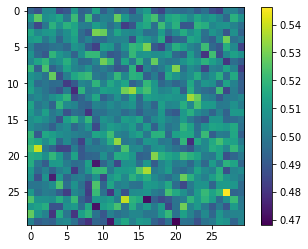

In [12]:
# ÏûÑÏùòÏùò 256,256,3 ÏûÖÎ†•Ïãú 30,30 Ï∂úÎ†• ÌÖåÏä§Ìä∏
x = tf.random.normal([1,256,256,3])
y = tf.random.uniform([1,256,256,3])

disc_out = Discriminator()(x, y)
plt.imshow(disc_out[0, ... ,0])
plt.colorbar()

---
## ÌïôÏäµ Î∞è ÌÖåÏä§Ìä∏
---
### ÌïôÏäµÏóê ÌïÑÏöîÌïú ÏÜêÏã§ Ìï®Ïàò Ï†ïÏùò

#### Generator Î∞è Discriminator ÏÜêÏã§ Ìï®Ïàò

In [13]:
from tensorflow.keras import losses

bce = losses.BinaryCrossentropy(from_logits=False)
mae = losses.MeanAbsoluteError()

#-----------------------------------------------------------------
# Generator ÏÜêÏã§Ìï®Ïàò
#-----------------------------------------------------------------
''' 
Parameters
- fake_output : Í∞ÄÏßú Ïù¥ÎØ∏ÏßÄ
- real_output : Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄ
- fake_disc : GeneratorÍ∞Ä ÏÉùÏÑ±Ìïú Í∞ÄÏßú Ïù¥ÎØ∏ÏßÄÎ•º DiscriminatorÏóê ÏûÖÎ†•ÌïòÏó¨ ÏñªÏùÄ Í∞í

Return
- gene_loss : BinaryCrossentropy 
- l1_loss : MeanAbsoluteError 
'''
def get_gene_loss(fake_output, real_output, fake_disc):
    l1_loss = mae(real_output, fake_output)
    gene_loss = bce(tf.ones_like(fake_disc), fake_disc)
    return gene_loss, l1_loss

#-----------------------------------------------------------------
# Discriminator ÏÜêÏã§Ìï®Ïàò
#-----------------------------------------------------------------
'''
Parameters
- fake_disc : Í∞ÄÏßú Ïù¥ÎØ∏ÏßÄÎ•º DiscriminatorÏóê ÏûÖÎ†•ÌïòÏó¨ ÏñªÏùÄ Í∞í
- real_disc : ÏßÑÏßú Ïù¥ÎØ∏ÏßÄÎ•º DiscriminatorÏóê ÏûÖÎ†•ÌïòÏó¨ ÏñªÏùÄ Í∞í

Return
- fake MeanAbsoluteError + real MeanAbsoluteError
'''
def get_disc_loss(fake_disc, real_disc):
    return bce(tf.zeros_like(fake_disc), fake_disc) + bce(tf.ones_like(real_disc), real_disc)

#-----------------------------------------------------------------


### optimizer ÏÑ§Ï†ï

In [14]:
from tensorflow.keras import optimizers

gene_opt = optimizers.Adam(2e-4, beta_1=.5, beta_2=.999)
disc_opt = optimizers.Adam(2e-4, beta_1=.5, beta_2=.999)

### ÌïòÎÇòÏùò Î∞∞Ïπò ÌÅ¨Í∏∞ Îç∞Ïù¥ÌÑ∞ ÏûÖÎ†•Ïãú Í∞ÄÏ§ëÏπò 1Ìöå ÏóÖÎç∞Ïù¥Ìä∏ Ìï®Ïàò

In [24]:
@tf.function
def train_step(sketch, real_colored):
    with tf.GradientTape() as gene_tape, tf.GradientTape() as disc_tape:
        # Generator
        fake_colored = generator(sketch, training=True)

        # Discriminator
        fake_disc = discriminator(sketch, fake_colored, training=True)
        real_disc = discriminator(sketch, real_colored, training=True)

        # Generator ÏÜêÏã§ Í≥ÑÏÇ∞
        gene_loss, l1_loss = get_gene_loss(fake_colored, real_colored, fake_disc)
        gene_total_loss = gene_loss + (100 * l1_loss)

        # Discriminator ÏÜêÏã§ Í≥ÑÏÇ∞
        disc_loss = get_disc_loss(fake_disc, real_disc)
    gene_gradient = gene_tape.gradient(gene_total_loss, generator.trainable_variables)
    disc_gradient = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    
    gene_opt.apply_gradients(zip(gene_gradient, generator.trainable_variables))
    disc_opt.apply_gradients(zip(disc_gradient, discriminator.trainable_variables))
    return gene_loss, l1_loss, disc_loss

### 10 Epoch ÌïôÏäµ

In [25]:
EPOCHS = 10

generator = UNetGenerator()
discriminator = Discriminator()

for epoch in range(1, EPOCHS+1):
    for i, (real, segments) in enumerate(train_images):
        g_loss, l1_loss, d_loss = train_step(segments, real)
                
        # 10Ìöå Î∞òÎ≥µÎßàÎã§ ÏÜêÏã§ÏùÑ Ï∂úÎ†•Ìï©ÎãàÎã§.
        if (i+1) % 10 == 0:
            print(f"EPOCH[{epoch}] - STEP[{i+1}] \
                    \nGenerator_loss:{g_loss.numpy():.4f} \
                    \nL1_loss:{l1_loss.numpy():.4f} \
                    \nDiscriminator_loss:{d_loss.numpy():.4f}", end="\n\n")

EPOCH[1] - STEP[10]                     
Generator_loss:0.7506                     
L1_loss:0.2177                     
Discriminator_loss:1.6021

EPOCH[1] - STEP[20]                     
Generator_loss:0.7022                     
L1_loss:0.1804                     
Discriminator_loss:1.5882

EPOCH[1] - STEP[30]                     
Generator_loss:0.6728                     
L1_loss:0.2232                     
Discriminator_loss:1.4440

EPOCH[1] - STEP[40]                     
Generator_loss:0.6598                     
L1_loss:0.1925                     
Discriminator_loss:1.3931

EPOCH[1] - STEP[50]                     
Generator_loss:0.7346                     
L1_loss:0.1750                     
Discriminator_loss:1.4338

EPOCH[1] - STEP[60]                     
Generator_loss:0.7462                     
L1_loss:0.1756                     
Discriminator_loss:1.4120

EPOCH[1] - STEP[70]                     
Generator_loss:0.6983                     
L1_loss:0.1786                    

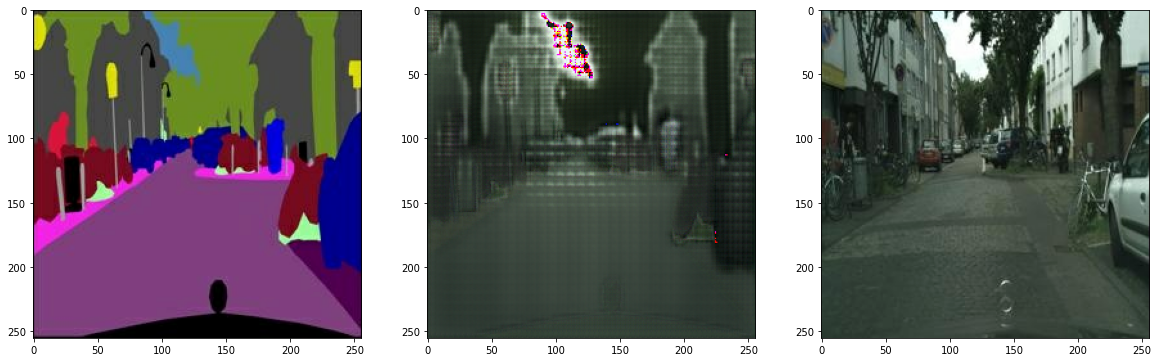

In [26]:
# ÏãúÍ∞ÅÌôî ÌÖåÏä§Ìä∏
test_ind = 1

f = data_path + os.listdir(data_path)[test_ind]
real, segment = load_img(f)

pred = generator(tf.expand_dims(segment, 0))
pred = denormalize(pred)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(denormalize(segment))
plt.subplot(1,3,2); plt.imshow(pred[0])
plt.subplot(1,3,3); plt.imshow(denormalize(real))